In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv('D:\YoutubeData.csv' , error_bad_lines=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_11960\384184408.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv('D:\YoutubeData.csv' , error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\HP\AppData\Local\Temp\ipykernel_11960\384184408.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('D:\YoutubeData.csv' , error_bad_lines=False)


In [3]:
comments.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


# lets find out missing values in your data 

In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

# drop missing values as we have very few & lets update dataframe as well..


In [5]:
comments.dropna(inplace=True)

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# PERFORM SENTIMENT ANALYSIS

In [7]:
from textblob import TextBlob

In [8]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [9]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [10]:
comments.shape

(691375, 4)

In [11]:
# for those of you who dont have good specifications , considering sample of data is a good option !

sample_df = comments[0:1000]

In [12]:
sample_df.shape

(1000, 4)

In [13]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

691375

In [15]:
comments['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [16]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Wordcloud Analysis of your data

In [17]:
filter1 = comments['polarity']==1

In [18]:
comments_positive = comments[filter1]

In [19]:
filter2 = comments['polarity']==-1

In [20]:
comments_negative = comments[filter2]

In [21]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [22]:
from wordcloud import WordCloud , STOPWORDS

In [23]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [24]:
type(comments['comment_text'])

pandas.core.series.Series

In [25]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [26]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

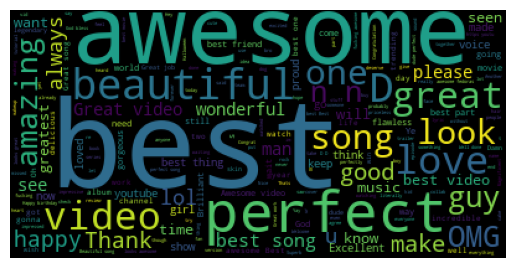

In [27]:
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [29]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [30]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

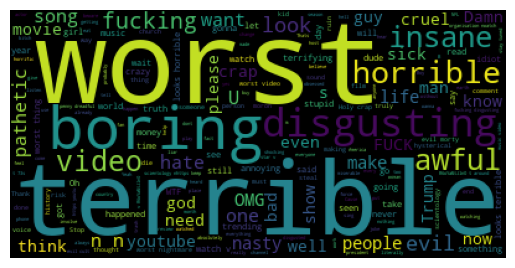

In [31]:
plt.imshow(wordcloud2)
plt.axis('off')

In [32]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..